# 13wk-55: Medical Cost / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-z3aXdGoLSgWL3LN2Vaf6TP&si=p804FxQaY35Z4cIo>

# 2. Imports

In [4]:
#!pip install autogluon.eda

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [7]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/insurance.csv')
df_train

# 4. 적합

In [8]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label='charges')
# step3 
predictr.fit(df_train)
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_114515/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231201_114515/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   248.33 GB / 490.57 GB (50.6%)
Train Data Rows:    1338
Train Data Columns: 6
Label Column: charges
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
    Label info (max, min, mean, stddev): (63770.42801, 1121.8739, 13270.42227, 12110.01124)
    If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the dat

# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

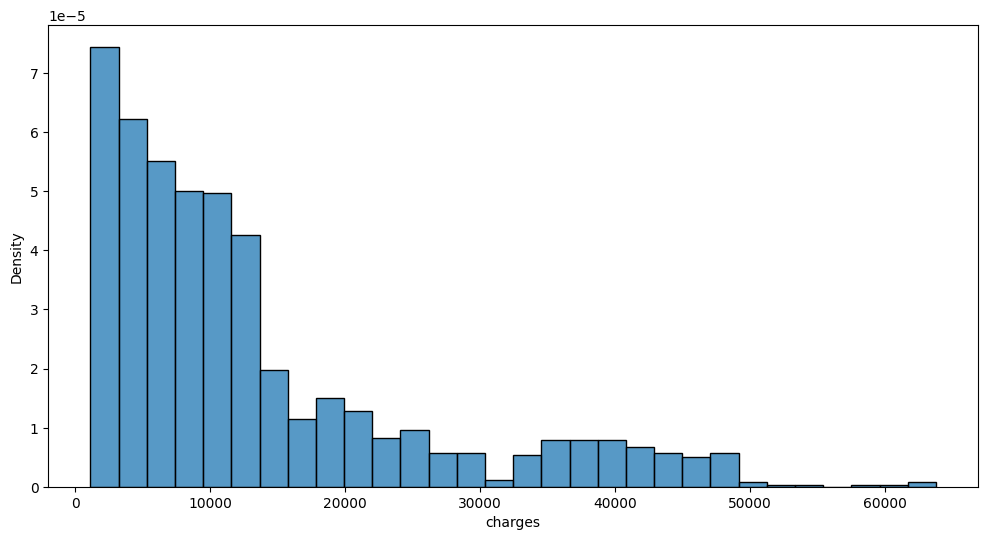

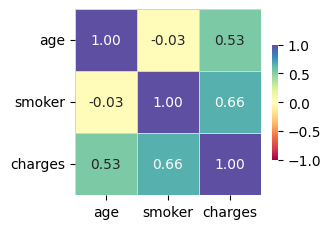

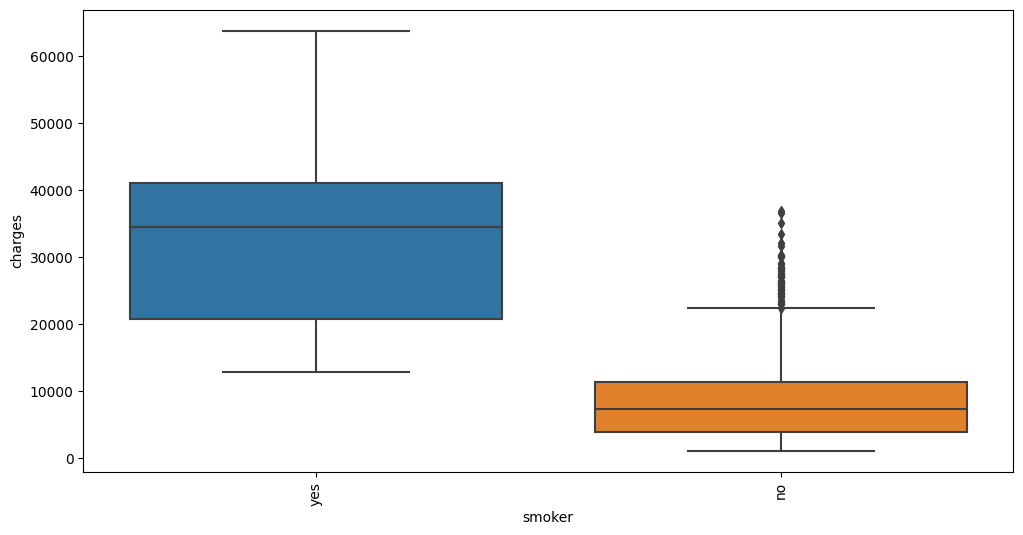

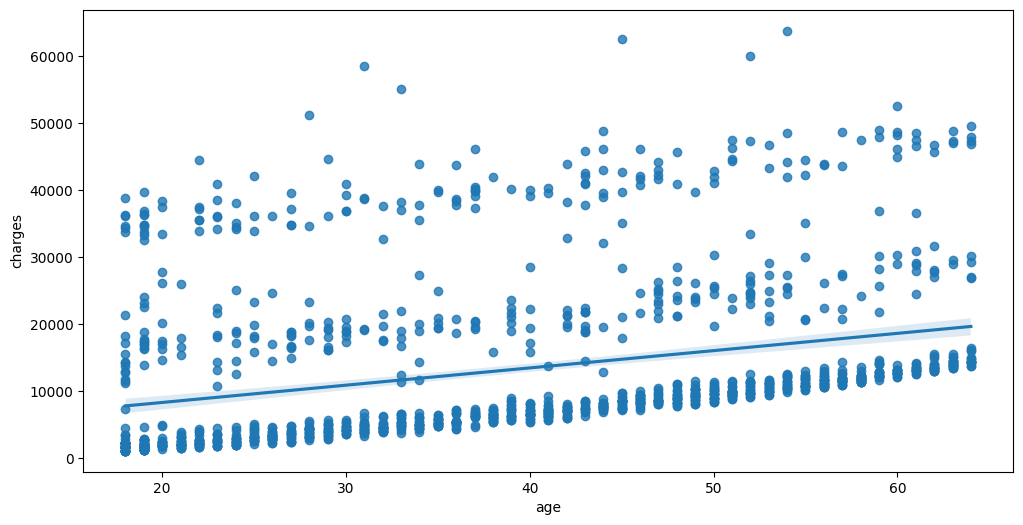

In [9]:
auto.target_analysis(
    train_data=df_train,
    label='charges',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_114747/"

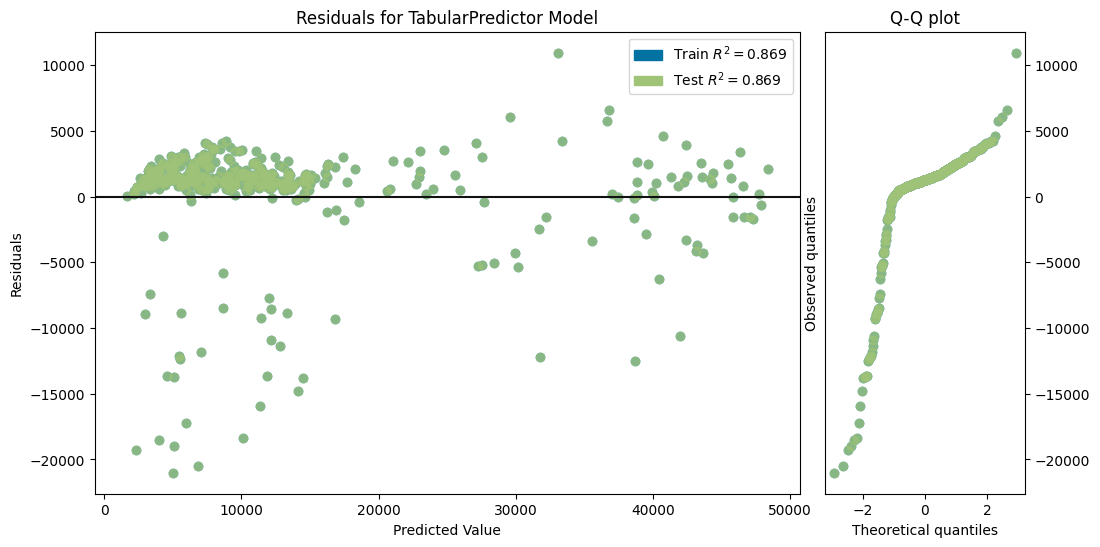

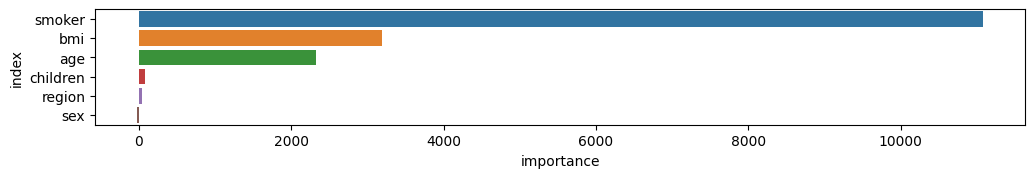

In [11]:
auto.quick_fit(
    train_data=df_train,
    label='charges',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석

`-` 1번째 관측치

In [23]:
df_train.iloc[[1]]

In [24]:
predictr.predict(df_train.iloc[[1]])

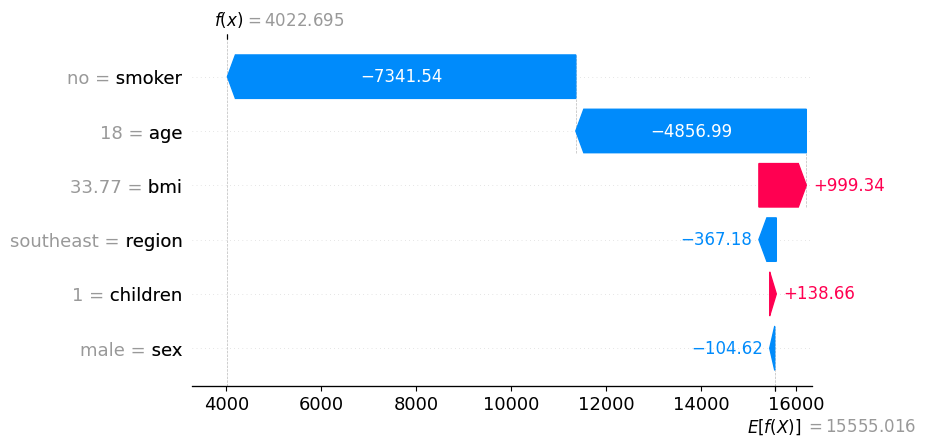

In [25]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[1]],
    display_rows=True,
    plot='waterfall'
)

`-` 6번째 관측치

In [20]:
df_train.iloc[[6]]

In [21]:
predictr.predict(df_train.iloc[[6]])

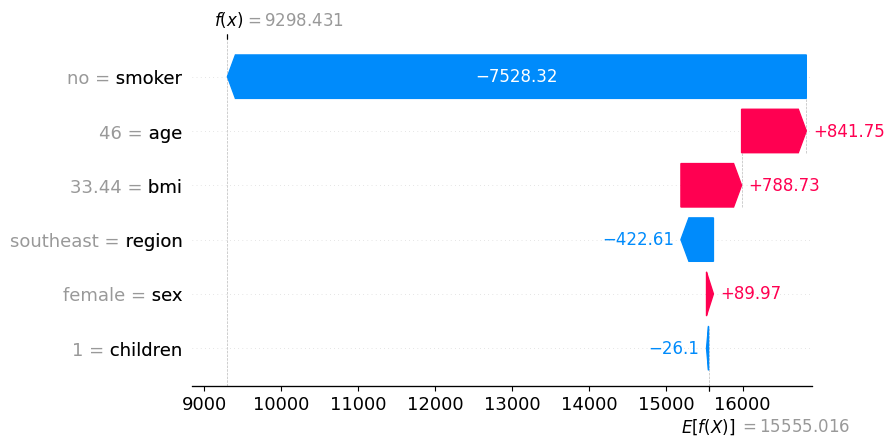

In [22]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[6]],
    display_rows=True,
    plot='waterfall'
)